# A bit of motivation (Audio processing)

Learning to program involves learning lots of details. To keep things simple, instructors tend to start with trivial code examples, but these end up being pretty uninteresting.  I would like to start this course with an interesting application of computing as a way of motivating you to learn how to write code.  I'd like to show that the payoff, from even a little bit of code, can be huge. I don't expect you to understand all the details initially, just the broad strokes.  In this first lecture/lab, we're going to leverage existing libraries of code to learn how computers represent music and other audio files.

As we go along, you'll encounter a number of completely new tasks, such as installing  software on your computer from the command line.  Rather than provide bite-size lectures on specific topics, we'll examine some real applications that require skills and knowledge across topics. It's better to see how all of the pieces fit together, rather than looking at topics in isolation. As you gain more experience, you will look back to these early examples and have an "ah ha!" moment when everything clicks into place for you.

## Playing sound files

We all play music files on our computers. For example, here are two interesting ones: [initial sequence from Kiss by Prince, Kiss.aiff](sound/Kiss.aiff) and [ahhh sound, ahhh.mp3](sound/ahhh.mp3).  You can download those and play them using your music player. But, what if we're building a game or doing speech recognition and we need Python to load sound files and play them? By leveraging libraries of code, which are like cookbooks, we can play audio files with just a few lines of Python code. You'll have an opportunity to try all of this Python code in the [sound lab for this lecture](../labs/sound.md), but for now just try to get the gist of the code and the principles behind digital audio.

To play an audio file in Python, we first have to load that audio file into memory. As we'll see shortly, an audio file is little more than a sequence of numbers. Here's some sample Python that loads in a bit of Prince's Kiss song:

In [27]:
import soundfile as sf
from IPython.display import Audio

kiss, samplerate = sf.read('sound/Kiss.aiff')
Audio(kiss, rate=samplerate)

The code begins by `import`ing some necessary code from some useful Python packages. The `sf.read(...)` is the key element that does the loading of the file into memory.  After that statement, variable `kiss` has the audio data. The `Audio(kiss,...)` bit is technically Python code, but it is something specific to Jupyter notebooks that lets me play the sound using the browser. It is purely for presentation purposes here. In your lab, you will do something like `sd.play(kiss, ...)` instead. 

Here's another audio file:

In [28]:
import sounddevice as sd
ahhh, samplerate = sf.read('sound/ahhh.wav')
Audio(ahhh[:,0], rate=samplerate)

To see what's inside the Kiss audio, we can print a subset of the values in variable `kiss`:

In [29]:
import numpy as np
np.set_printoptions(suppress=True) # weird numpy thing to avoid scientific notation

In [30]:
print("n =",len(kiss),", rate =",samplerate,"hz")
print(kiss[5000:5100])  # kiss is a numpy ndarray that you will become intimately familiar with

n = 123269 , rate = 44100 hz
[ 0.00003052  0.         -0.00009155  0.00018311 -0.00024414  0.00030518
 -0.00033569  0.00030518 -0.00027466  0.00027466 -0.00021362  0.00006104
  0.00003052 -0.00003052  0.00006104 -0.00003052 -0.00009155  0.00015259
 -0.00015259  0.00015259 -0.00009155  0.00003052 -0.00003052  0.
  0.00003052 -0.00006104  0.00009155 -0.00003052 -0.00006104  0.00009155
 -0.00012207  0.00018311 -0.00015259  0.00009155 -0.00006104  0.00006104
 -0.00006104  0.00012207 -0.00021362  0.00024414 -0.00021362  0.00015259
 -0.00009155  0.00003052  0.00003052 -0.00006104  0.00003052  0.
 -0.00003052  0.00009155 -0.00012207  0.00006104  0.         -0.00006104
  0.00006104  0.         -0.00006104  0.00006104 -0.00006104  0.00006104
  0.         -0.00006104  0.          0.00009155 -0.00009155  0.00006104
  0.         -0.00009155  0.00015259 -0.00015259  0.00009155 -0.00003052
  0.          0.00003052 -0.00003052  0.         -0.00003052  0.00003052
  0.00006104 -0.00009155  0.00003052  

You're probably wondering what the sample rate is and how numbers can represent audio. It works in the same way that movies grab snapshots (pictures) very frequently. Playing them back at the same speed gives the illusion of movement. How often a movie takes a picture is called the frame rate and might be something like 32 frames per second. An audio file takes a snapshot as well, but instead of an image, it grabs the audio volume (sound pressure) at a particular instant. A very common sampling rate for music is 44,100 times per second (44,100 Hertz).  During audio playback, each value is used to deflect the diaphram of a speaker away from its neutral position. Believe it or not, this shakes the air molecules in the room in a way that reproduces the original sound. See this speaker movement in action in an awesome scene from Big Bang theory:

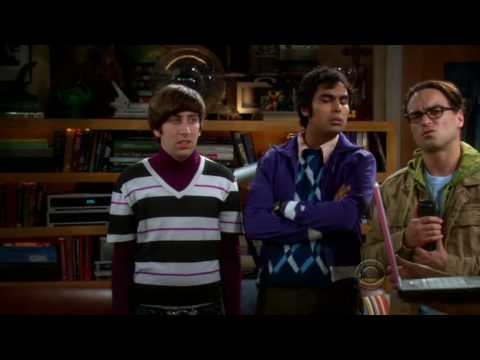

In [31]:
from IPython.display import YouTubeVideo
YouTubeVideo("2CJJ6FrfuGU")

A microphone is the opposite of a speaker and has a very sensitive diaphragm that subtly vibrates in the presence of soundwaves.  If we measure the deflection of the microphone away from neutral at a very fast and regular rate, we *digitize* a signal such as an audio signal. Graphically, it looks like this time vs amplitude plot (magnitude of microphone deflection):

<img src="images/Signal_Sampling.png" style="width:400px">

The microphone is wiggling in a continuous fashion and knows nothing about sampling rate. It is a so-called analog signal. To get that into a computer, we must convert it to numbers. The numbers you saw above for the Kiss song are the result of digitization.

Now let's go the other way by generating and digitizing our own simple signal then seeing what it sounds like. The key bit in the Python code that follows is the `sin(2*numpy.pi*440*t)` that creates a sine wave at 440 hz (440 full sine waves per second, 440 cycles through 0..2&pi; radians or 0..360 degrees per second). The `plt.scatter(...)` draws the signal versus time (the X axis).

66150 samples in 1.5 seconds


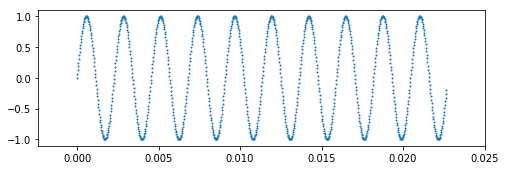

In [32]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
fs = 44100 # sampling frequency
T = 1.5    # seconds
t = numpy.linspace(0, T, int(T*fs), endpoint=False) # time variable
y = numpy.sin(2*numpy.pi*440*t)                     # pure sine wave at 440 Hz
print(len(y), "samples in", T, "seconds")
plt.figure(figsize=(8, 2.5))                        # Prepare a plot 8x2.5 inches
plt.scatter(t[0:1000],y[0:1000],s=1)
plt.show()

**Exercise**: What do you think that will sound like if we run it through the speaker?

It's a pure tone at 440Hz. Imagine a speaker moving out then in then out repeatedly the same distance each time. Now if you move your hand like a speaker up and down you get sort of a Boing Boing Boing motion. Now start walking and move your hand up and down at the same rate. To an observer, the motion looks like a sine wave! So, that is what is happening with the speaker.  A constant deflection up and down gives a pure tone to the human ear.

In [33]:
from IPython.display import Audio
Audio(y, rate=fs)

Let's make another signal, `y2`, that is at a higher frequency (700 Hz).

**Exercise**: What do you think it will sound like in comparison to the previous signal?

In [34]:
from IPython.display import Audio
y2 = numpy.sin(2*numpy.pi*700*t)                     # pure sine wave at 700 Hz
Audio(y2, rate=fs)

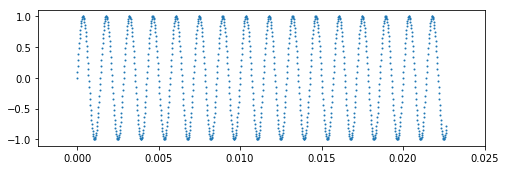

In [35]:
plt.figure(figsize=(8, 2.5))
plt.scatter(t[0:1000],y2[0:1000],s=1)
plt.show()

**Exercise**: If I play both of those at the same time, what do you think it will sound like?

Yep, we hear the sounds merged together as a chord. Mathematically, what we are doing is simply adding the signal amplitudes together which we can do with `y+y2` where `y` and `y2` our lists of numbers. Adding the vectors adds the ith elements together to get a new signal, which we can plot and play:

In [36]:
Audio(y+y2, rate=fs)                            # Play both sounds together

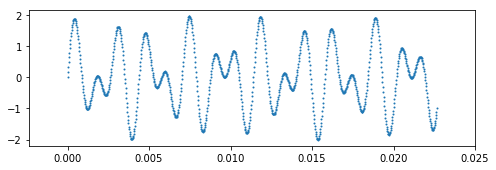

In [37]:
plt.figure(figsize=(8, 2.5))
plt.scatter(t[0:1000],y[0:1000]+y2[0:1000],s=1) # zoom in on y+y2 for a plot
plt.show()

If your wondering why that sounds like the button tones on a phone, it's because phone buttons play two pure tones as the sound to identify which button you pushed.

Now let's look at the signal plots for the two audio files:

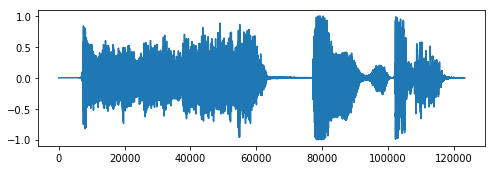

In [38]:
plt.figure(figsize=(8, 2.5))
plt.plot(kiss);
plt.show()

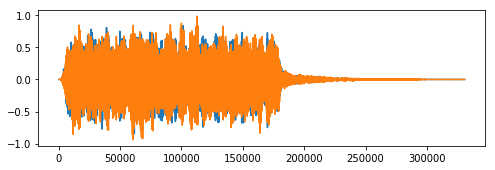

In [39]:
plt.figure(figsize=(8, 2.5))
plt.plot(ahhh); # notice this one has two plots because it is a stereo signal
plt.show()

Those complicated signals can all be decomposed into the addition of a series of pure-tone sine waves. The frequency of the sine waves indicate the frequencies of sound (pitch) present in the audio signal. Humans can hear from about 150Hz to 17,000Hz I think.

A really cool looking plot is the so-called spectrogram, which shows the frequencies in use at a particular moment in time:

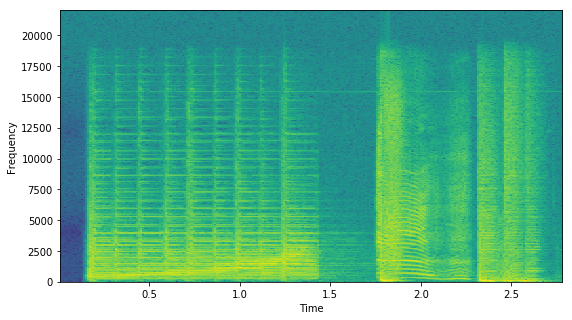

In [42]:
fs = 44100 # sampling frequency

# Plot the spectrogram
plt.figure(figsize=(9, 5))
S, freqs, bins, im = plt.specgram(kiss, NFFT=1024, Fs=fs, noverlap=512)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

### Exercises

Ok, now that we've got an idea how computers represent music, let's do a lab that lets you try playing sounds via Python. But first, we really need to do a simple "hello" program to introduce the Python tools we'll use in this class.

* [A first taste of Python tools](../labs/hello.md)
* [Playing sounds](../labs/sound.md)